In [42]:
import numpy
import pandas as pd

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [44]:
job_info_file = '../files/slurm_jobinfo.csv'
job_info_data = pd.read_csv(job_info_file, header=None, low_memory=False)
job_info_data.columns = job_info_data.iloc[0]
job_info_data = job_info_data[1:]

In [45]:
job_info_data = job_info_data.drop(columns=['JobName', 'GroupID', 'MCS_label', 'Priority', 'Nice','Account', 'QOS', 'WCKey', 
                                            'JobState', 'Reason', 'Dependency', 'Deadline',
                                            'SuspendTime', 'SecsPreSuspend', 'Partition', 'AllocNode:Sid', 'ReqNodeList',
                                            'ExcNodeList', 'ReqB:S:C:T', 'TRES', 'Socks/Node', 'NtasksPerN:B:S:C', 'Power', 
                                            'StdOut', 'StdIn', 'StdErr', 'Comment', 'WorkDir', 'Command', 'Network',
                                            'Licenses', 'Contiguous', 'OverSubscribe', 'Reservation', 'Features', 
                                            'MinTmpDiskNode', 'MinMemoryNode', 'MinCPUsNode', 'CoreSpec', 'BatchHost',
                                            'NodeList'])
job_info_data.head()

,NaN,JobID,UserID,Requeue,Restarts,BatchFlag,Reboot,ExitCode,RunTime,TimeLimit,TimeMin,SubmitTime,EligibleTime,AccrueTime,StartTime,EndTime,LastSchedEval,NumNodes,NCPUs,NumTasks,CPUs/Task,DelayBoot
1,0.0,2021931,gramsn(50619),0,0,1,0,0:0,00:00:00,2-00:00:00,NaN,2022-06-19T07:41:59,2022-06-19T07:41:59,2022-06-19T07:41:59,2022-06-19T23:44:18,2022-06-21T23:44:18,2022-06-19T23:44:18,1,56,1,1,00:00:00
2,1.0,2021973,gramsn(50619),0,0,1,0,0:0,00:00:00,2-00:00:00,NaN,2022-06-19T07:42:11,2022-06-19T07:42:11,2022-06-19T07:42:11,2022-06-19T23:44:18,2022-06-21T23:44:18,2022-06-19T23:44:18,1,56,1,1,00:00:00
3,2.0,2021960,gramsn(50619),0,0,1,0,0:0,00:00:00,2-00:00:00,NaN,2022-06-19T07:42:07,2022-06-19T07:42:07,2022-06-19T07:42:07,2022-06-19T23:44:18,2022-06-21T23:44:18,2022-06-19T23:44:18,1,56,1,1,00:00:00
4,3.0,2021934,gramsn(50619),0,0,1,0,0:0,00:00:00,2-00:00:00,NaN,2022-06-19T07:42:00,2022-06-19T07:42:00,2022-06-19T07:42:00,2022-06-19T23:44:18,2022-06-21T23:44:18,2022-06-19T23:44:18,1,56,1,1,00:00:00
5,4.0,2021976,gramsn(50619),0,0,1,0,0:0,00:00:00,2-00:00:00,NaN,2022-06-19T07:42:12,2022-06-19T07:42:12,2022-06-19T07:42:12,2022-06-19T23:44:18,2022-06-21T23:44:18,2022-06-19T23:44:18,1,56,1,1,00:00:00


In [46]:
job_result_file = '../files/slurm_jobinfo_acct.csv'
job_result_data = pd.read_csv(job_result_file, header=None, low_memory=False)
job_result_data.columns = job_result_data.iloc[0]
job_result_data = job_result_data[1:]
job_result_data = job_result_data[['Account', 'ExitCode', 'JobID', 'Start', 'State', 'Submit', 'SystemCPU', 'UserID']]
job_result_data.head()

,Account,ExitCode,JobID,Start,State,Submit,SystemCPU,UserID
1,g2admin,0:0,2021931,2022-06-19T23:44:18,COMPLETED,2022-06-19T07:41:59,23:08.737,50619
2,g2admin,0:0,2021931.batch,2022-06-19T23:44:18,COMPLETED,2022-06-19T23:44:18,23:08.737,NaN
3,g2admin,0:0,2021932,2022-06-19T23:44:18,COMPLETED,2022-06-19T07:42:00,15:07.183,50619
4,g2admin,0:0,2021932.batch,2022-06-19T23:44:18,COMPLETED,2022-06-19T23:44:18,15:07.183,NaN
5,g2admin,0:0,2021933,2022-06-19T23:44:18,COMPLETED,2022-06-19T07:42:00,21:21.383,50619


In [47]:
job_result_data_without_batches = job_result_data[~job_result_data['JobID'].str.contains('batch')]
job_result_data_without_batches.head()

,Account,ExitCode,JobID,Start,State,Submit,SystemCPU,UserID
1,g2admin,0:0,2021931,2022-06-19T23:44:18,COMPLETED,2022-06-19T07:41:59,23:08.737,50619
3,g2admin,0:0,2021932,2022-06-19T23:44:18,COMPLETED,2022-06-19T07:42:00,15:07.183,50619
5,g2admin,0:0,2021933,2022-06-19T23:44:18,COMPLETED,2022-06-19T07:42:00,21:21.383,50619
7,g2admin,0:0,2021934,2022-06-19T23:44:18,COMPLETED,2022-06-19T07:42:00,21:17.992,50619
9,g2admin,0:0,2021935,2022-06-19T23:44:18,COMPLETED,2022-06-19T07:42:00,24:15.526,50619


In [48]:
job_result_data_without_nan_user = job_result_data_without_batches.loc[~pd.isnull(job_result_data['UserID'])]
print(job_result_data_without_nan_user.UserID.unique())

['50619' '50119' '50456' '50701' '50104' '50482' '50195' '50665' '50109'
 '50635' '50532' '50164' '50481' '50190' '50577' '50264' '50625' '50121'
 '50341' '50636' '50666' '50674' '50638' '50102' '50667' '50555' '50661'
 '50688' '50703' '50272' '50369' '50696' '50687' '50287' '50123' '50501'
 '50260' '50390' '50539' '50608' '50600' '50693' '50664' '50637' '50294'
 '50354' '50632' '50550' '50631' '50609' '50498' '50111' '50233' '50342'
 '50339' '50344' '50430' '50147' '50654' '50649' '50313' '50308' '50549'
 '50613' '50672' '0' '50594' '50633' '50235' '50418' '50671' '50606'
 '50100' '50655' '50050' '50676' '50220' '50699' '50709' '50012' '50420'
 '50653' '50383' '50174' '50656' '50700' '50286' '50628' '50719' '50706'
 '50614' '50523' '50442' '50101' '50657' '50262' '50502' '50544' '50290'
 '50515' '50115' '50292' '50297' '50626' '50189' '50114' '50277' '50295'
 '50232' '50296' '50293' '50280' '50170' '50683' '50726' '50727' '50310'
 '50378' '50236' '50729' '50728' '50222' '50187' '50393

In [49]:
uniques_state = job_result_data_without_nan_user.State.unique()
print(uniques_state)

['COMPLETED' 'CANCELLED by 50119' 'CANCELLED by 50456'
 'CANCELLED by 50619' 'FAILED' 'TIMEOUT' 'CANCELLED by 50665'
 'CANCELLED by 50190' 'CANCELLED by 50264' 'CANCELLED by 50625'
 'CANCELLED by 50341' 'CANCELLED by 50222' 'CANCELLED by 50636'
 'CANCELLED by 50666' 'CANCELLED by 50109' 'NODE_FAIL'
 'CANCELLED by 50667' 'CANCELLED by 50555' 'CANCELLED by 50481'
 'CANCELLED by 50688' 'CANCELLED by 50577' 'CANCELLED by 50687'
 'CANCELLED by 50102' 'CANCELLED by 50123' 'CANCELLED by 50164'
 'CANCELLED by 50501' 'CANCELLED by 50701' 'CANCELLED by 50635'
 'CANCELLED by 50390' 'CANCELLED by 50272' 'CANCELLED by 50608'
 'CANCELLED by 50693' 'CANCELLED by 50532' 'CANCELLED by 50637'
 'CANCELLED by 50294' 'CANCELLED by 50354' 'CANCELLED by 50674'
 'CANCELLED by 50195' 'CANCELLED by 50260' 'CANCELLED by 50600'
 'CANCELLED by 50550' 'CANCELLED by 50609' 'CANCELLED by 50498'
 'CANCELLED by 50104' 'CANCELLED by 50344' 'CANCELLED by 50631'
 'CANCELLED by 50147' 'CANCELLED by 50654' 'CANCELLED by 503

In [50]:
job_result_data_acc_and_state = job_result_data_without_nan_user[['UserID', 'State']]

success_jobs = job_result_data_acc_and_state.loc[job_result_data['State'].str.contains('COMPLETED')]
canceled_jobs = job_result_data_acc_and_state.loc[job_result_data['State'].str.contains('CANCELLED')]
failed_jobs = job_result_data_acc_and_state.loc[job_result_data['State'].str.contains('FAILED|TIMEOUT|OUT_OF_MEMORY|NODE_FAIL')]

In [60]:
success_group_by_user = success_jobs.groupby(['UserID'])['UserID'].count().reset_index(name='success_jobs')
failed_group_by_user = failed_jobs.groupby(['UserID'])['UserID'].count().reset_index(name='failed_jobs')
canceled_group_by_user = canceled_jobs.groupby(['UserID'])['UserID'].count().reset_index(name='canceled_jobs')

all_group_by_user = job_result_data_acc_and_state.groupby(['UserID'])['UserID'].count().reset_index(name='all_jobs')
all_group_by_user = all_group_by_user.merge(success_group_by_user, left_on = 'UserID', right_on = 'UserID', how = 'inner')
all_group_by_user = all_group_by_user.merge(failed_group_by_user, left_on = 'UserID', right_on = 'UserID', how = 'inner')
all_group_by_user = all_group_by_user.merge(canceled_group_by_user, left_on = 'UserID', right_on = 'UserID', how = 'inner')

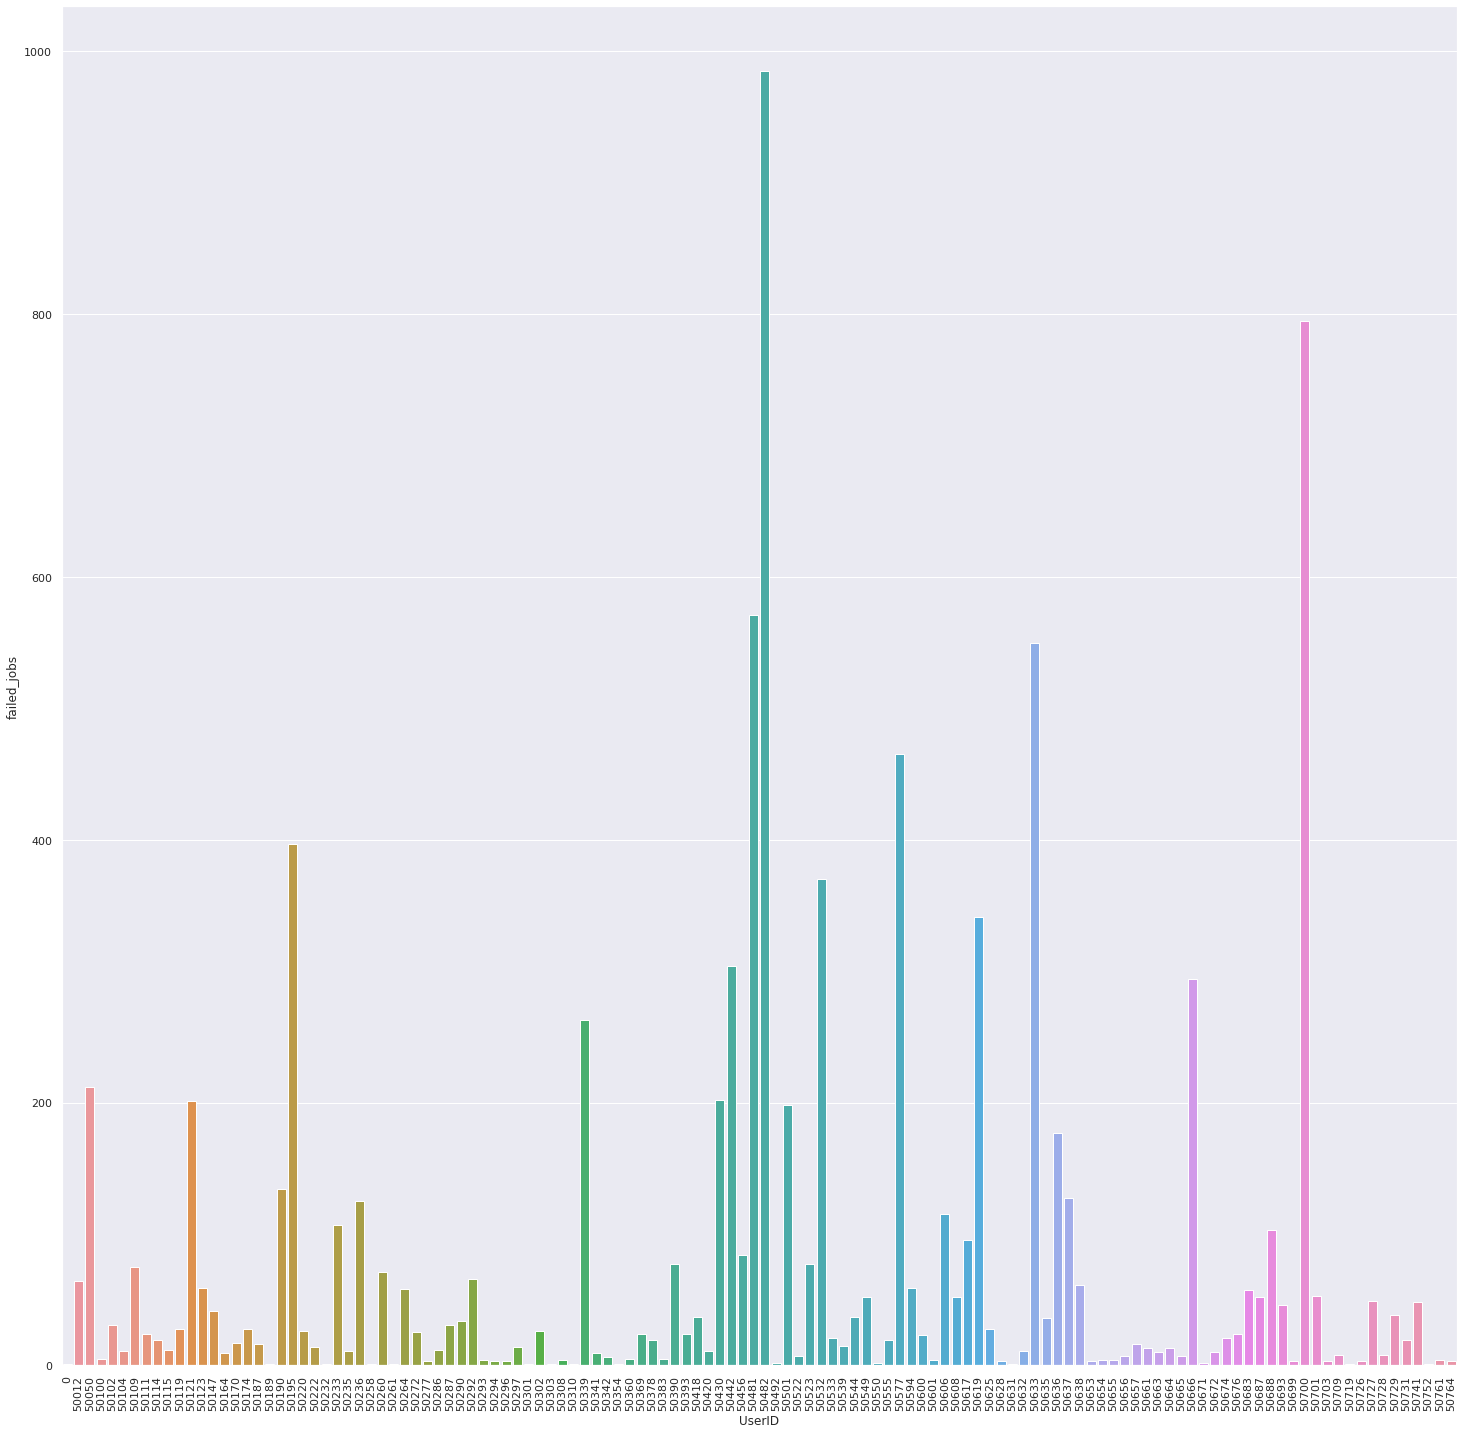

In [75]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,25)})
pl = sns.barplot(x='UserID', y='failed_jobs', data=failed_group_by_user)
pl.tick_params(axis='x', rotation=90)

In [76]:
all_group_by_user['fail / all %'] = all_group_by_user['failed_jobs'] / all_group_by_user['all_jobs'] * 100
all_group_by_user['fail + cancell / all %'] = ( all_group_by_user['failed_jobs'] + all_group_by_user['canceled_jobs'] ) / all_group_by_user['all_jobs'] * 100
all_group_by_user['fail / success %'] = all_group_by_user['failed_jobs'] / all_group_by_user['success_jobs'] * 100

In [77]:
display(all_group_by_user)

,UserID,all_jobs,success_jobs,failed_jobs,canceled_jobs,failed %,failed success %,fail / all %,fail + cansell / all %,fail / success %,fail + cancell / all %
0,50012,161,38,64,59,39.751553,168.421053,39.751553,76.397516,168.421053,76.397516
1,50050,535,294,212,29,39.626168,72.108844,39.626168,45.046729,72.108844,45.046729
2,50100,38,27,5,6,13.157895,18.518519,13.157895,28.947368,18.518519,28.947368
3,50102,885,823,31,13,3.502825,3.766707,3.502825,4.971751,3.766707,4.971751
4,50104,620,595,11,10,1.774194,1.848739,1.774194,3.387097,1.848739,3.387097
5,50109,993,904,75,14,7.552870,8.296460,7.552870,8.962739,8.296460,8.962739
6,50111,218,176,24,15,11.009174,13.636364,11.009174,17.889908,13.636364,17.889908
7,50114,68,33,19,15,27.941176,57.575758,27.941176,50.000000,57.575758,50.000000
8,50115,23,2,12,8,52.173913,600.000000,52.173913,86.956522,600.000000,86.956522
9,50119,89,17,28,44,31.460674,164.705882,31.460674,80.898876,164.705882,80.898876


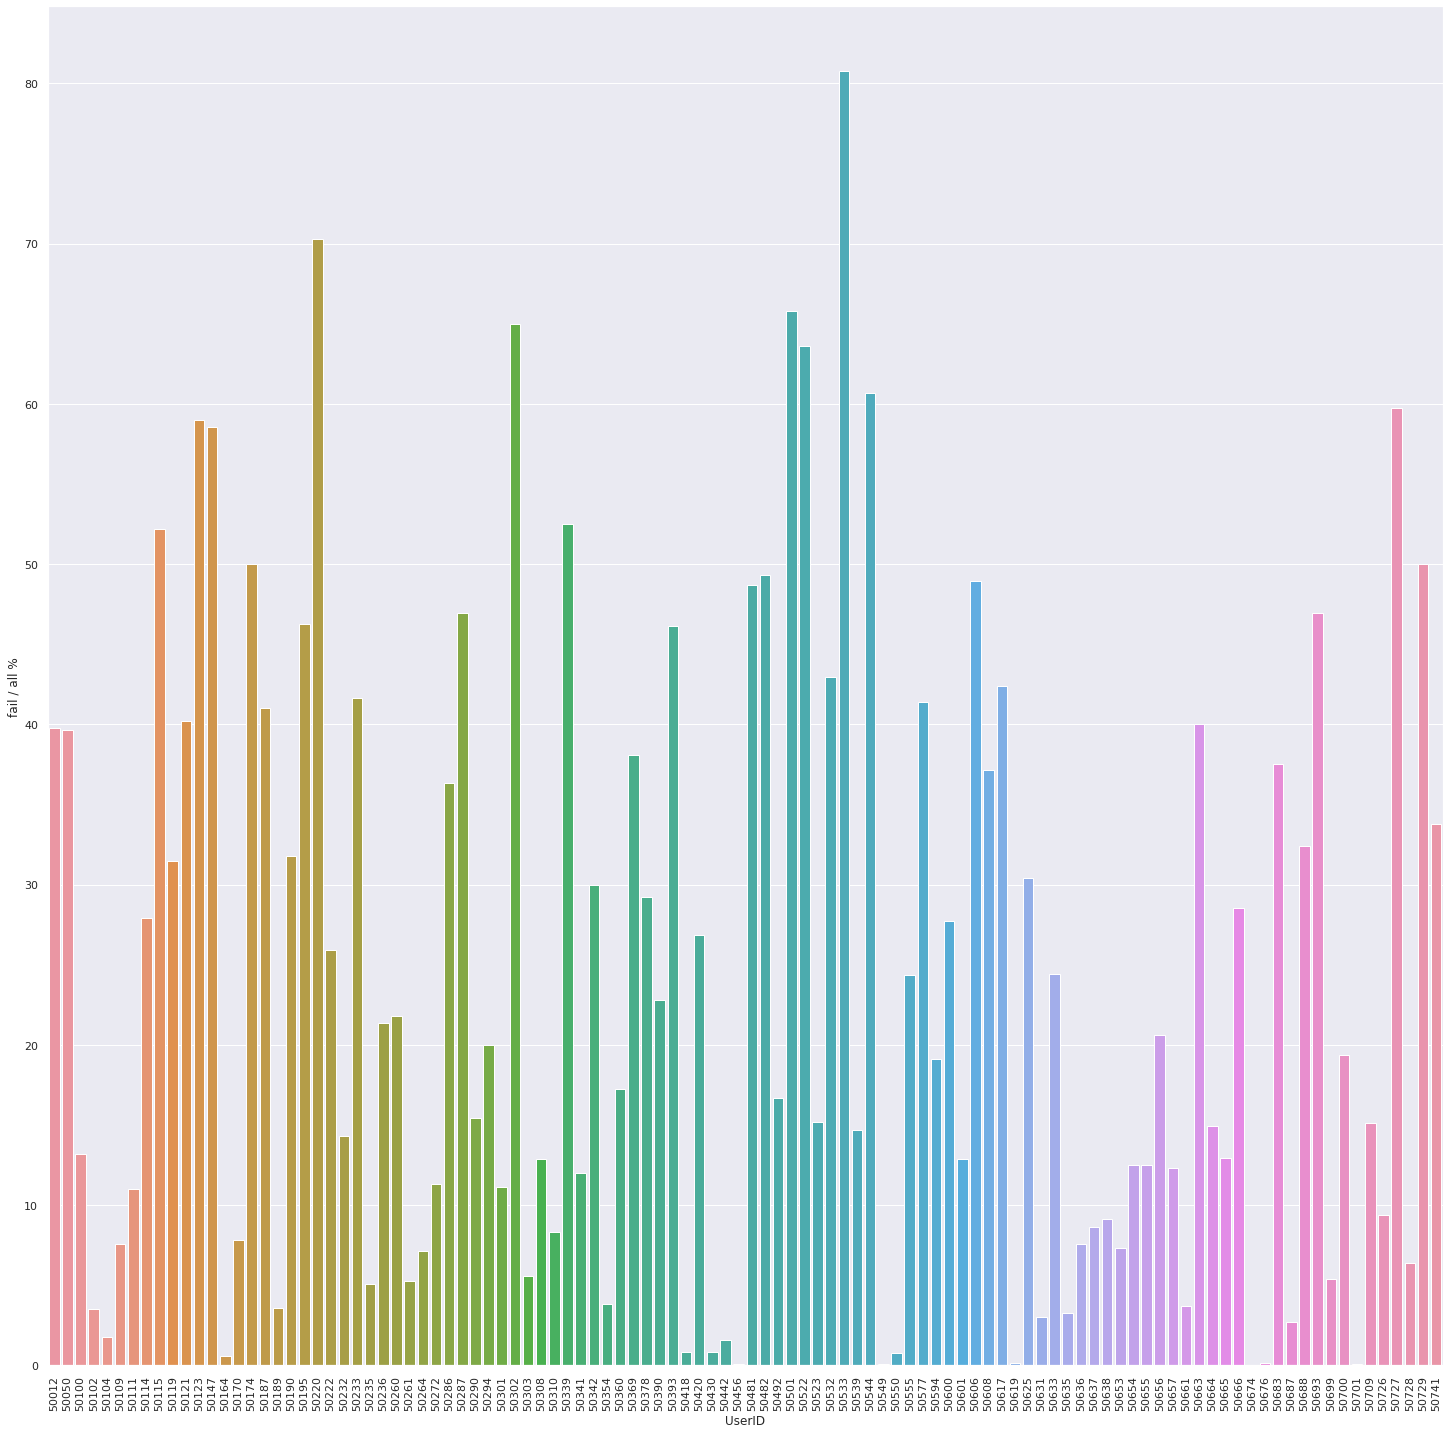

In [78]:
sns.set(rc={'figure.figsize':(25,25)})
pl = sns.barplot(x='UserID', y='fail / all %', data=all_group_by_user)
pl.tick_params(axis='x', rotation=90)

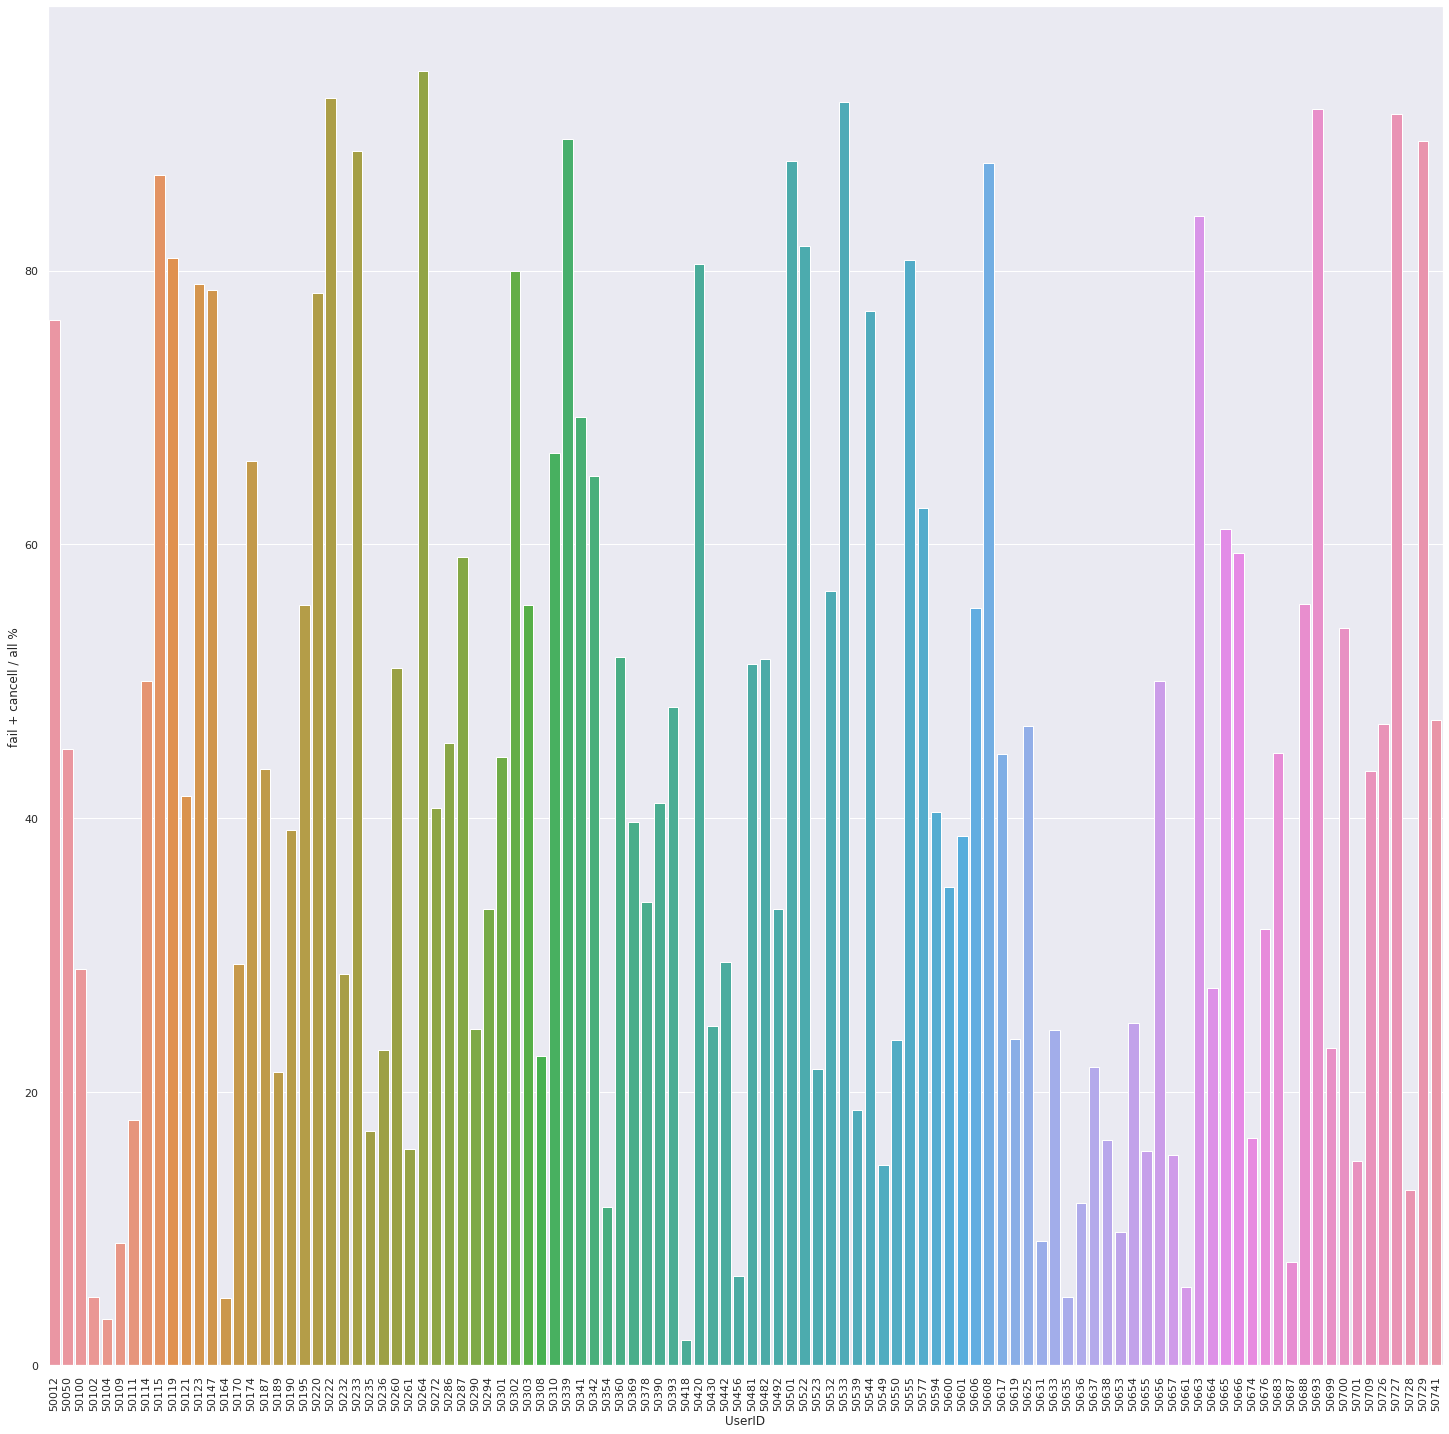

In [79]:
sns.set(rc={'figure.figsize':(25,25)})
pl = sns.barplot(x='UserID', y='fail + cancell / all %', data=all_group_by_user)
pl.tick_params(axis='x', rotation=90)

In [81]:
all_group_by_user_how_has_many_jobs = all_group_by_user.loc[all_group_by_user['all_jobs'] > 10000]
display(all_group_by_user_how_has_many_jobs)

,UserID,all_jobs,success_jobs,failed_jobs,canceled_jobs,failed %,failed success %,fail / all %,fail + cansell / all %,fail / success %,fail + cancell / all %
50,50430,25050,18848,202,6000,0.806387,1.071732,0.806387,24.758483,1.071732,24.758483
51,50442,18993,13396,304,5293,1.600590,2.269334,1.600590,29.468752,2.269334,29.468752
52,50456,75152,70230,84,4837,0.111773,0.119607,0.111773,6.548063,0.119607,6.548063
63,50549,52787,45042,52,7693,0.098509,0.115448,0.098509,14.672173,0.115448,14.672173
73,50619,214424,163283,341,50800,0.159031,0.208840,0.159031,23.850409,0.208840,23.850409
91,50674,54246,45240,21,8985,0.038713,0.046419,0.038713,16.602146,0.046419,16.602146
92,50676,18294,12456,24,5814,0.131191,0.192678,0.131191,31.912102,0.192678,31.912102
99,50701,49274,41903,53,7317,0.107562,0.126483,0.107562,14.957178,0.126483,14.957178


In [88]:
all_group_by_user_how_has_normal_jobs = all_group_by_user.loc[(all_group_by_user['all_jobs'] > 300) & (all_group_by_user['all_jobs'] < 2000)]
display(all_group_by_user_how_has_normal_jobs)

,UserID,all_jobs,success_jobs,failed_jobs,canceled_jobs,failed %,failed success %,fail / all %,fail + cansell / all %,fail / success %,fail + cancell / all %
1,50050,535,294,212,29,39.626168,72.108844,39.626168,45.046729,72.108844,45.046729
3,50102,885,823,31,13,3.502825,3.766707,3.502825,4.971751,3.766707,4.971751
4,50104,620,595,11,10,1.774194,1.848739,1.774194,3.387097,1.848739,3.387097
5,50109,993,904,75,14,7.552870,8.296460,7.552870,8.962739,8.296460,8.962739
10,50121,500,290,201,7,40.200000,69.310345,40.200000,41.600000,69.310345,41.600000
13,50164,1497,1412,9,65,0.601202,0.637394,0.601202,4.943220,0.637394,4.943220
18,50190,422,252,134,31,31.753555,53.174603,31.753555,39.099526,53.174603,39.099526
19,50195,858,381,397,80,46.270396,104.199475,46.270396,55.594406,104.199475,55.594406
25,50236,586,450,125,10,21.331058,27.777778,21.331058,23.037543,27.777778,23.037543
26,50260,326,159,71,95,21.779141,44.654088,21.779141,50.920245,44.654088,50.920245
